# BlockChain
##### This tool helps the users to determine the right time to purchase bitcoins .. It Correlates the trade volume and price and give a visualization
##### This tool also helps the usess to identify the major bitcoin platform based on the market cap owned by each provider


## Project Objective :
The Objective of the project is  to determine the correlation between Bit Coin price and Bit Coin Trade Volume and also determine the distribution of Bit Coins across some platforms who provides the trading services to users over the past 3 years.

## Data Source :
  https://www.blockchain.com/ ‘s API has been used to capture the data 

## Modules used :

### requests :
Requests will allow you to send HTTP/1.1 requests using Python. With it, you can add content like headers, form data, multipart files, and parameters via simple Python libraries. It also allows you to access the response data of Python in the same way.
### json:
json exposes an API familiar to users of the standard library marshal and pickle modules
### objectpath
ObjectPath is a query language similar to XPath or JSONPath, but much more powerful thanks to embedded arithmetic calculations, comparison mechanisms and built-in functions.
### datetime
The datetime module supplies classes for manipulating dates and times in both simple and complex ways.
### csv
The csv module implements classes to read and write tabular data in CSV format.
###  itertools
The Python itertools module is a collection of tools for handling iterators. Simply put, iterators are data types that can be used in a for loop.
### pandas 
pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language
### matplotlib
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

### Step 1
#### The First Step in the process is to capture the data.
####  The data source for the project is https://www.blockchain.com/ 's api. Past 3 years data till now is captured  for the project

In [154]:
# Define Data Apis
Price_URL = 'https://blockchain.info/charts/market-price?timespan=1095days&format=json'
Trade_Volume_URL ='https://api.blockchain.info/charts/trade-volume?timespan=1095days&format=json'
Market_Cap = 'https://api.blockchain.info/pools?cors=true'

### Step2
second step is to extract useful information from raw data and store them in lists


In [150]:
import json
import objectpath
from datetime import datetime

trade_data = json.loads(requests.get(Trade_Volume_URL).text)
jsonnn_tree = objectpath.Tree(trade_data)
#using JSON path to extract data
trade_volume = list(jsonnn_tree.execute('$..y'))


price_data = json.loads(requests.get(Price_URL).text)
jsonnn_tree = objectpath.Tree(price_data)
#using JSON path to extract data
time_series = list(jsonnn_tree.execute('$..x'))
price = list(jsonnn_tree.execute('$..y'))

## List comprehension to convert timestamp to YYYY-mm-dd format and store in the same list
time_series=[ datetime.fromtimestamp(timestamp).strftime("%Y-%m-%d") for timestamp in time_series]

 

### Step 3:

Third step is to export the data to csv file , this will help in visualizing time series data using pandas

In [151]:
#Export The extracted data to CSV
import csv
from itertools import zip_longest

d = [time_series, price]
export_data = zip_longest(*d, fillvalue = '')
with open('price.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Date", "Price"))
      wr.writerows(export_data)
myfile.close()

d = [time_series,trade_volume]
export_data = zip_longest(*d, fillvalue = '')
with open('tradevolume.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Date", "volume"))
      wr.writerows(export_data)
myfile.close()

### Step4 :
4th step is to plot  graphs using pandas and matplotlib

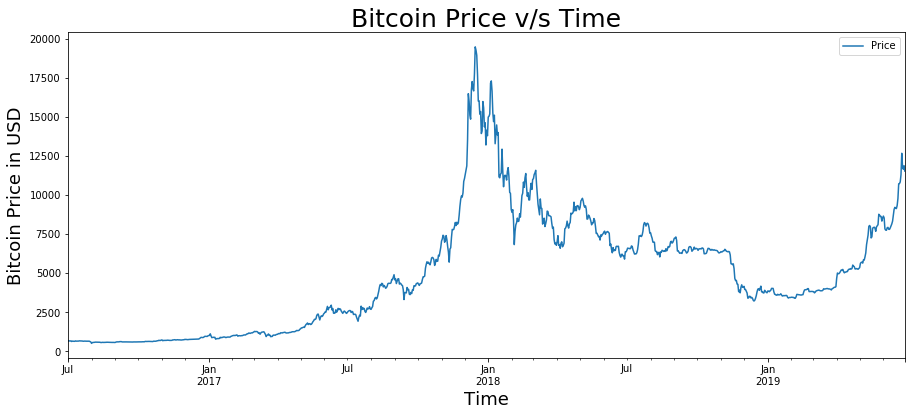

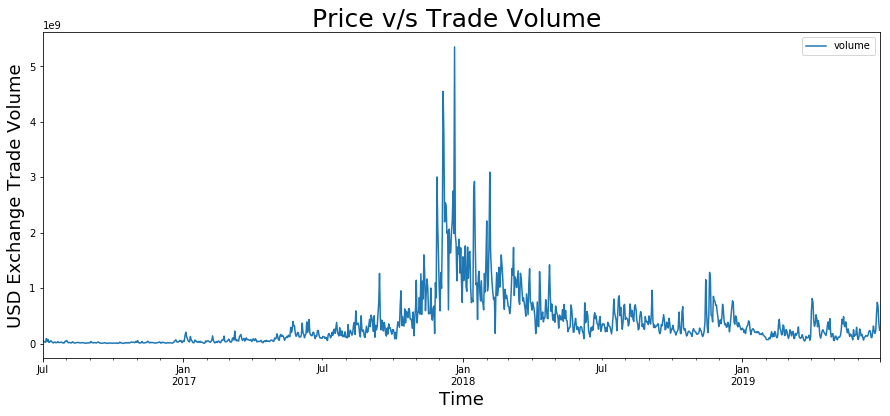

<Figure size 432x288 with 0 Axes>

In [213]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


# Read Price vs time data
data = pd.read_csv('price.csv')
# Define data frame
df = pd.DataFrame(data, columns = ['Date', 'Price'])
# Set the Date as Index
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
del df['Date']
# Plot Figure with size and title
axis = df.plot(figsize=(15, 6),title="Bitcoin Price v/s Time",fontsize=10)
axis.set_xlabel("Time",fontsize=18)
axis.set_ylabel("Bitcoin Price in USD",fontsize=18)
axis.title.set_size(25)

# Read tradevolume 
data = pd.read_csv('tradevolume.csv')
# Define data frame
df = pd.DataFrame(data, columns = ['Date', 'volume'])
# Set the Date as Index
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
del df['Date']
axis=df.plot(figsize=(15, 6),title="Price v/s Trade Volume ",fontsize=10)
axis.set_xlabel("Time",fontsize=18)
axis.set_ylabel("USD Exchange Trade Volume",fontsize=18)
axis.title.set_size(25)
plt.show()

# Conclusion : 
#### From the above graph we can conclude that people tend to buy and sell bitcoins more when the price is going high

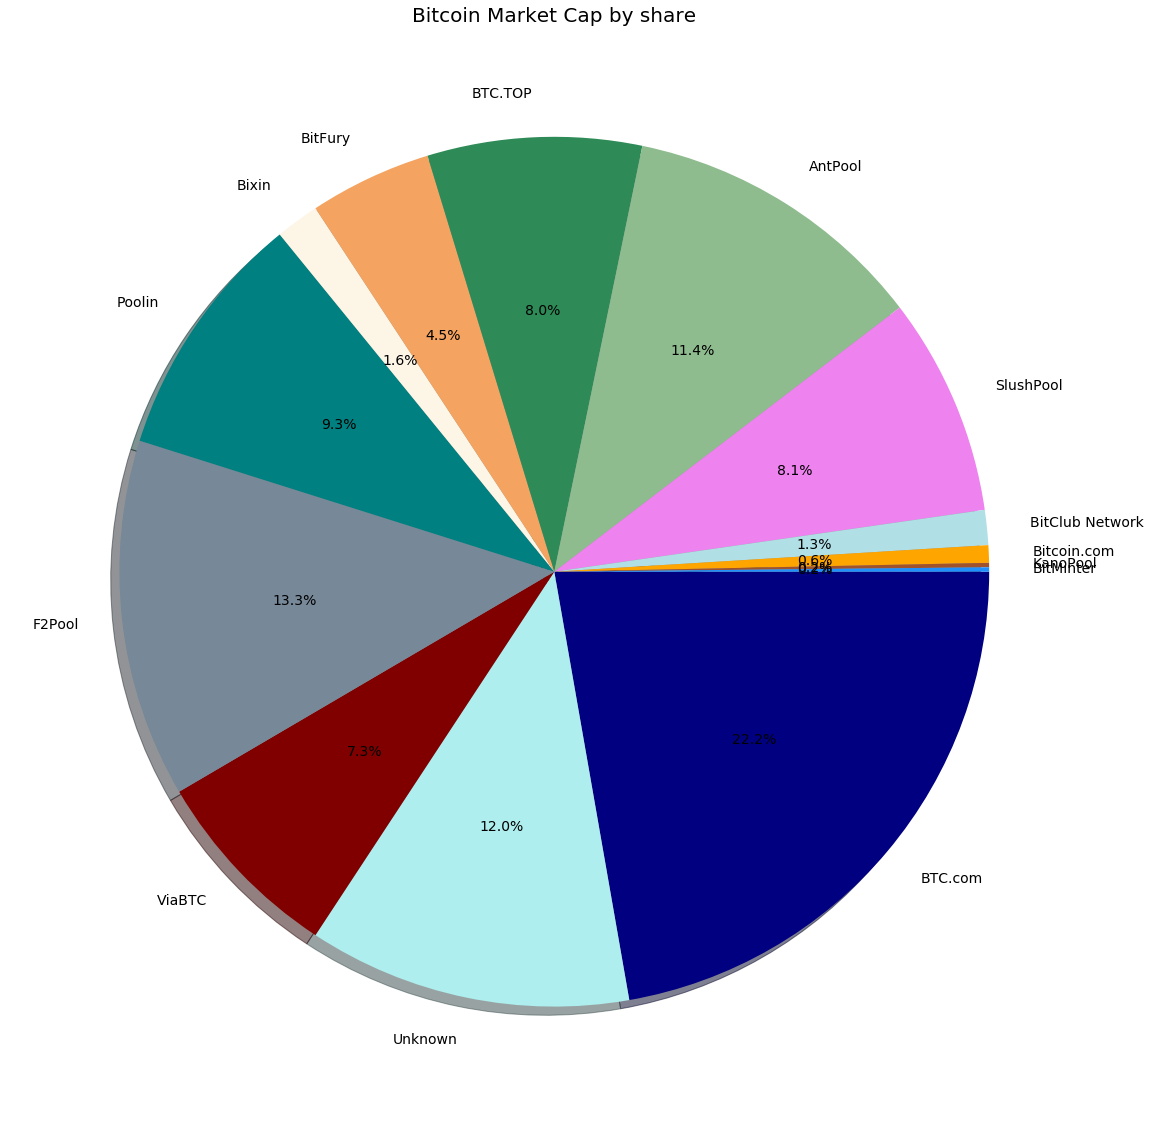

In [211]:
import requests
import json
# get data from API
data = json.loads(requests.get(Market_Cap).text)
sizes = list()
labels= list()
# Seperate keys and values
for key, value in data.items():
    labels.append(key)
    sizes.append(value)
    
# Plottting a pie chart    
import matplotlib.pyplot as plt
explode = (0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0,0, 0)
fig1, ax1 = plt.subplots(figsize=(50, 20))
colors = {'#FDF5E6','#EE82EE','#008080','#A0522D','#2E8B57','#F4A460','#B0E0E6','#AFEEEE','#000080','#FFA500','#800000','#778899','#1E90FF','#8FBC8F'}
plt.pie(sizes, colors=colors, labels= labels,explode=explode,counterclock=False, autopct='%1.1f%%',shadow=True, textprops={'fontsize': 14})
plt.title('Bitcoin Market Cap by share',fontsize=20)
plt.show()

###  Conclusion
The pie chart abvoe shows the market share of the most popular bitcoin mining pools.From the above pie chart we can conclude that BTC.com has a share of 22.3% which is the heighest share.